<a href="https://colab.research.google.com/github/ever-oli/MLBy22/blob/main/churn_predictionEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loading dataset from Hugging Face...
Dataset loaded successfully with 7043 rows and 21 columns.

Cleaning data and handling missing values...
Data cleaned. Addressed 11 missing values. Current shape: (7032, 21)

 Generating Visualizations...



/tmp/ipython-input-787386944.py:51: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




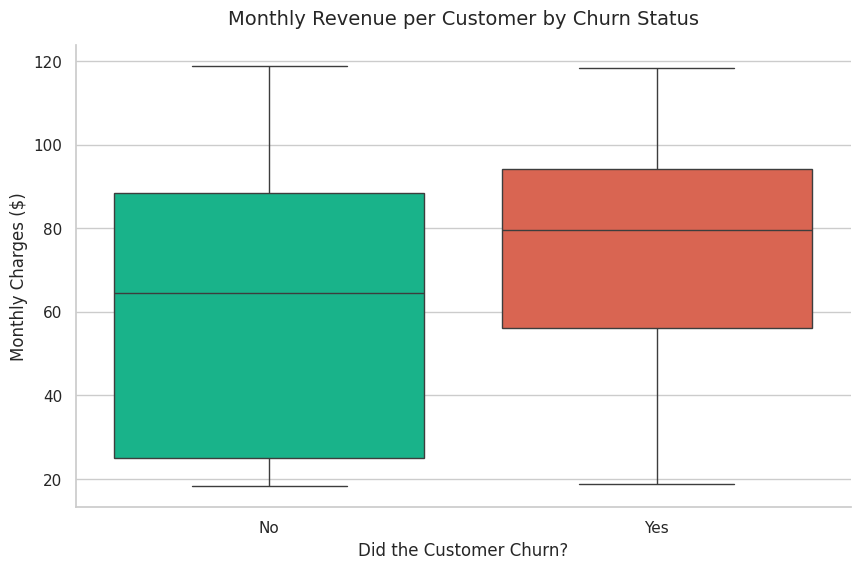

EDA complete. 


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datasets import load_dataset

sns.set_theme(style="whitegrid", palette="muted")

print("Loading dataset from Hugging Face...")
dataset = load_dataset("scikit-learn/churn-prediction", split="train")
df = dataset.to_pandas()

print(f"Dataset loaded successfully with {df.shape[0]} rows and {df.shape[1]} columns.\n")

print("Cleaning data and handling missing values...")

###
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].replace(' ', np.nan))

##
missing_initial = df.isnull().sum().sum()
df.dropna(inplace=True)

##
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

print(f"Data cleaned. Addressed {missing_initial} missing values. Current shape: {df.shape}\n")

print(" Generating Visualizations...\n")

# --- Visualization A: The High-Level View (Plotly) ---
churn_counts = df['Churn'].value_counts().reset_index()
churn_counts.columns = ['Churn', 'Count']

fig1 = px.pie(
    churn_counts,
    names='Churn',
    values='Count',
    hole=0.4,
    title='<b>Current Customer Churn Rate</b><br><sup>Percentage of customers leaving vs. staying</sup>',
    color='Churn',
    color_discrete_map={'Yes': '#ef553b', 'No': '#00cc96'}
)
fig1.update_traces(textposition='inside', textinfo='percent+label')
fig1.show()


# --- Visualization B: Revenue Impact (Seaborn) ---
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette={'Yes': '#ef553b', 'No': '#00cc96'})
plt.title('Monthly Revenue per Customer by Churn Status', fontsize=14, pad=15)
plt.xlabel('Did the Customer Churn?', fontsize=12)
plt.ylabel('Monthly Charges ($)', fontsize=12)
sns.despine() # Removes top and right borders for a cleaner look
plt.show()


# --- Visualization C: Loyalty & Retention (Plotly) ---
fig2 = px.histogram(
    df,
    x="tenure",
    color="Churn",
    barmode="group",
    title='<b>Customer Retention Journey</b><br><sup>When are we losing customers? (Tenure in Months)</sup>',
    labels={'tenure': 'Months with Company', 'count': 'Number of Customers'},
    color_discrete_map={'Yes': '#ef553b', 'No': '#00cc96'},
    opacity=0.85
)
fig2.update_layout(bargap=0.1)
fig2.show()

print("EDA complete. ")